<a href="https://colab.research.google.com/github/brunotdcsilva/DATA2/blob/main/Copy_of_Untitled2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from google.colab import files
# Load the dataset
#file_path = r"C:\Users\Utilizador\OneDrive\Documents\3ano\cleaned.csv"


uploaded = files.upload()

# Load the dataset
data = pd.read_csv("cleaned.csv")


# Data Preprocessing
# Handle missing values (if any)
# Remove duplicates (if any)
# Encode categorical variables
# Perform feature scaling
# Assuming all features are numerical for simplicity


# Drop rows with missing values
imputer = SimpleImputer(strategy='mean')
data.fillna(data.mean(), inplace=True)

# Remove duplicates
data.drop_duplicates(inplace=True)

# Data Preprocessing
categorical_cols = ['Age_band_of_driver', 'Sex_of_driver', 'Educational_level',
       'Vehicle_driver_relation', 'Driving_experience', 'Lanes_or_Medians',
       'Types_of_Junction', 'Road_surface_type', 'Light_conditions',
       'Weather_conditions', 'Type_of_collision', 'Vehicle_movement',
       'Pedestrian_movement', 'Cause_of_accident', 'Accident_severity']

# Initialize LabelEncoder for each categorical column
label_encoders = {}
for col in categorical_cols:
    label_encoders[col] = LabelEncoder()
    data[col] = label_encoders[col].fit_transform(data[col])

# Convert 'Accident_severity' to binary labels (1 for slight injuries, 0 for non-slight and severe injuries)
data['Injury_Severity'] = (data['Accident_severity'] == 'Slight').astype(int)

# Merge classes 1 and 2 into a single class representing severe injuries, and keep class 0 as it is
data['Injury_Severity'] = data['Accident_severity'].replace({1: 1, 2: 1, 0: 0})

# Select features and target variable
selected_features = ['Age_band_of_driver', 'Sex_of_driver', 'Educational_level',
       'Vehicle_driver_relation', 'Driving_experience', 'Lanes_or_Medians',
       'Types_of_Junction', 'Road_surface_type', 'Light_conditions',
       'Weather_conditions', 'Type_of_collision', 'Vehicle_movement',
       'Pedestrian_movement', 'Cause_of_accident']
X = data[selected_features]
y = data['Injury_Severity']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ensure both classes are represented in y_train
print("Unique values in y_train:", np.unique(y_test))

print("Data preprocessing successful")






Saving cleaned.csv to cleaned (14).csv
Unique values in y_train: [0 1]
Data preprocessing successful


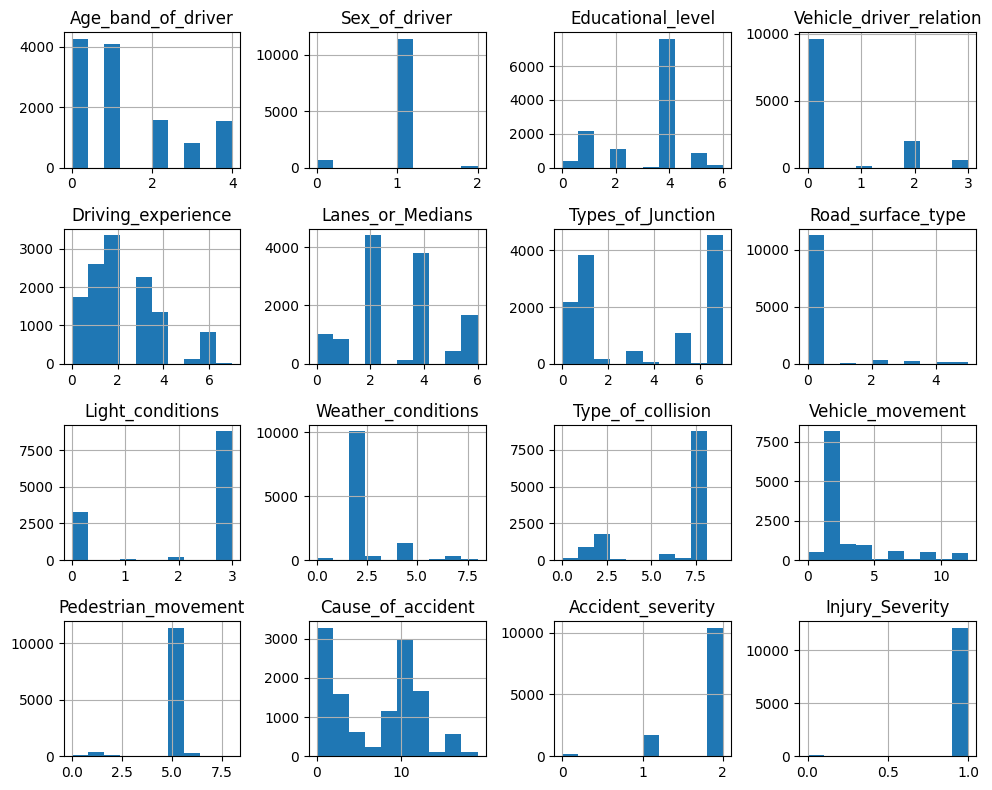

In [ ]:
# Data Exploration and Visualization

# Histograms for numerical features
data.hist(figsize=(10, 8))
plt.tight_layout()
plt.show()

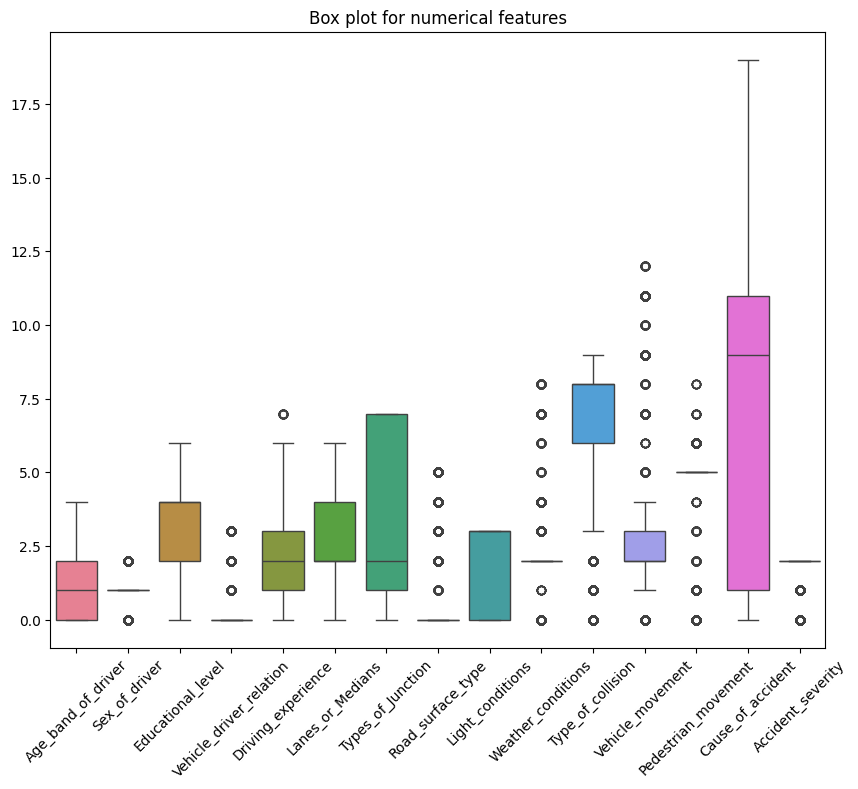

In [ ]:
# Box plots for numerical features
plt.figure(figsize=(10, 8))
sns.boxplot(data=data)
plt.title("Box plot for numerical features")
plt.xticks(rotation=45)
plt.show()

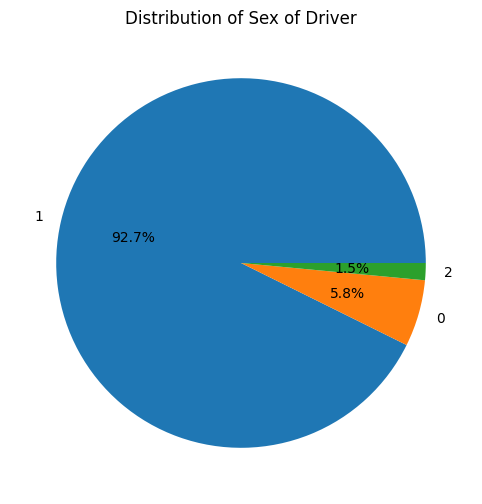

In [ ]:
# Pie chart for categorical feature
plt.figure(figsize=(8, 6))
data['Sex_of_driver'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of Sex of Driver')
plt.ylabel('')
plt.show()

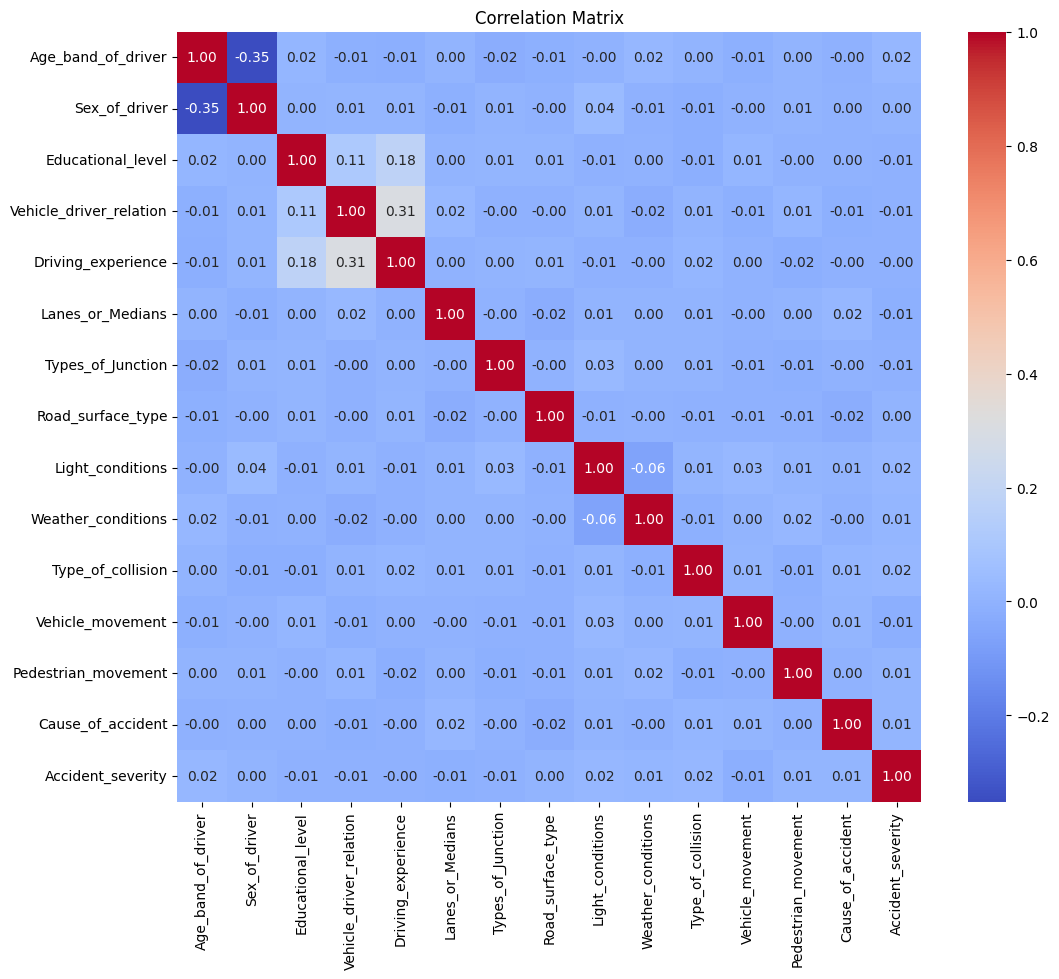

In [ ]:
# Correlation matrix
correlation_matrix = data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

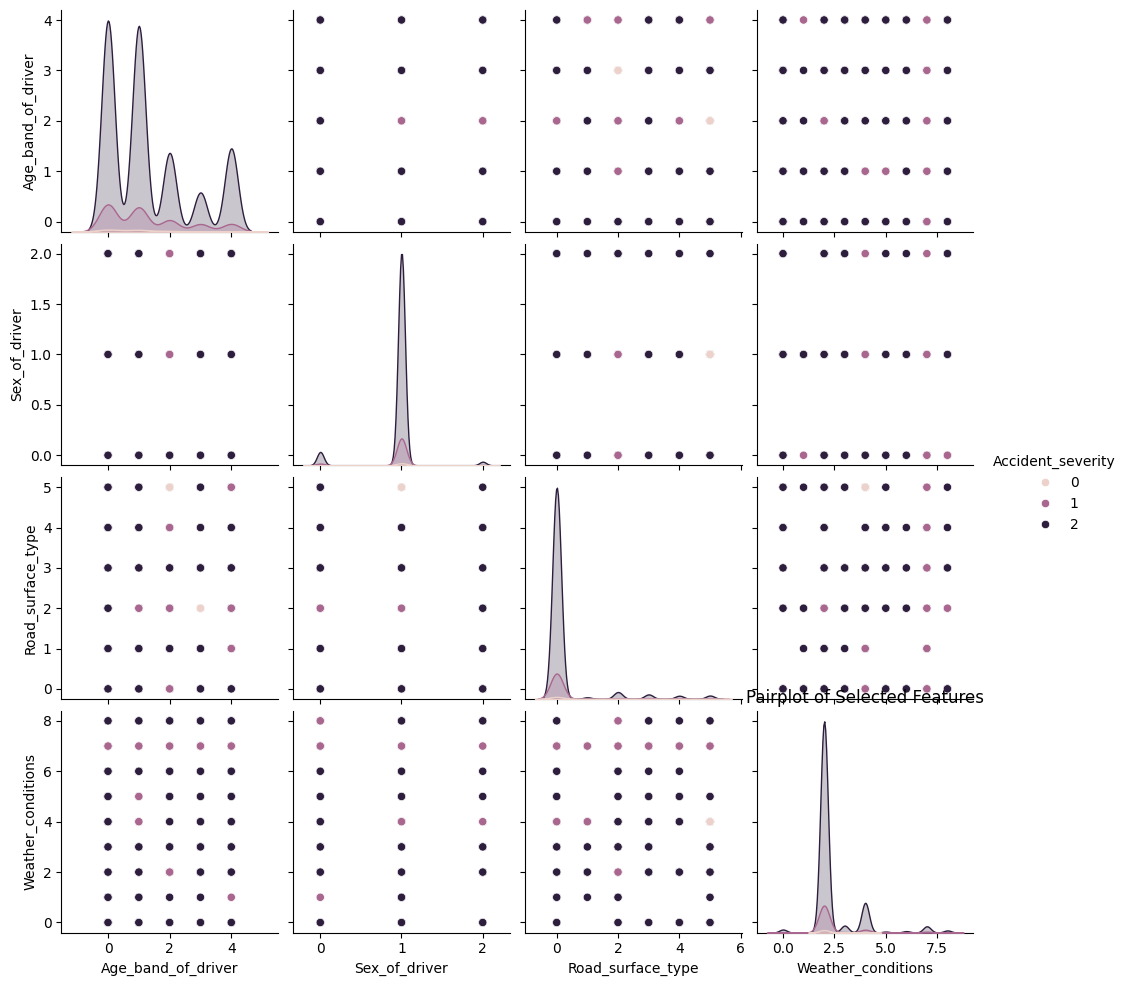

In [ ]:
# Pairplot for selected features
selected_features = ['Age_band_of_driver', 'Sex_of_driver', 'Road_surface_type', 'Weather_conditions', 'Accident_severity']
sns.pairplot(data[selected_features], hue='Accident_severity', diag_kind='kde')
plt.title('Pairplot of Selected Features')
plt.show()

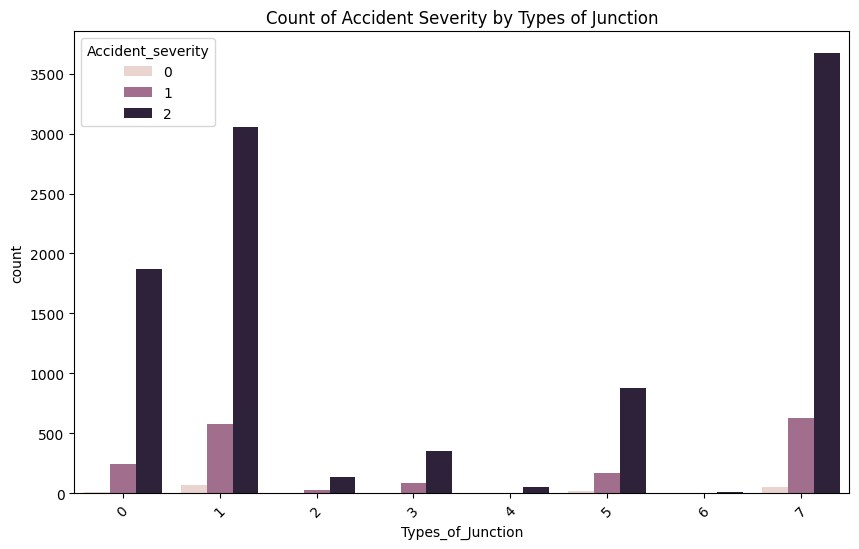

In [ ]:
# Bar plot for a categorical feature
plt.figure(figsize=(10, 6))
sns.countplot(x='Types_of_Junction', hue='Accident_severity', data=data)
plt.title('Count of Accident Severity by Types of Junction')
plt.xticks(rotation=45)
plt.show()

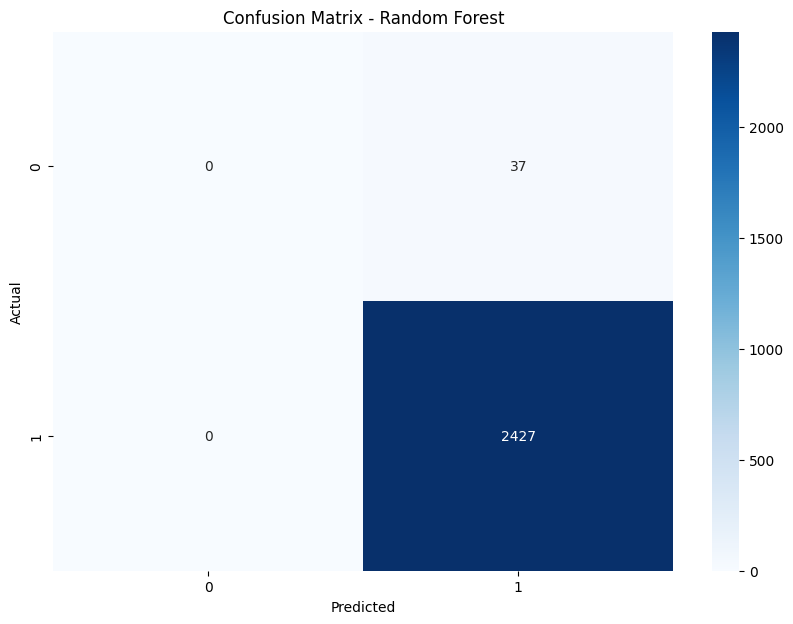

Accuracy: 0.9849837662337663
Report:
              precision    recall  f1-score   support

           0       1.00      0.00      0.00        37
           1       0.98      1.00      0.99      2427

    accuracy                           0.98      2464
   macro avg       0.99      0.50      0.50      2464
weighted avg       0.99      0.98      0.98      2464



In [ ]:
# Scenario A: Random Forest 1
rf_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('rf', RandomForestClassifier(random_state=42))
])

# Def GridSearchCV
rf_param_grid = {
    'rf__n_estimators': [100, 200, 300],
    'rf__max_depth': [None, 10, 20, 30],
    'rf__min_samples_split': [2, 5, 10],
    'rf__min_samples_leaf': [1, 2, 4]
}

#  GridSearchCV for Random Forest
rf_grid = GridSearchCV(rf_pipe, rf_param_grid, cv=5, n_jobs=-1, verbose=0)
rf_grid.fit(X_train, y_train)

# Prediction
rf_pred = rf_grid.predict(X_test)

# Evaluate
accuracy = accuracy_score(y_test, rf_pred)
report = classification_report(y_test, rf_pred, zero_division=1)

conf_matrix = confusion_matrix(y_test, rf_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest')
plt.show()


print(f"Accuracy: {accuracy}")
print("Report:")
print(report)




In [ ]:
# Scenario A: Random Forest 2
# Define the parameter grid for Random Forest




rf_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('rf', RandomForestClassifier(random_state=42))
])

# Def GridSearchCV
rf_param_grid = {
   'n_estimators': [300, 400, 500],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# GridSearchCV for Random Forest
rf_grid = GridSearchCV(RandomForestClassifier(random_state=42), rf_param_grid, cv=5, n_jobs=-1, verbose=0)
rf_grid.fit(X_train, y_train)


# Prediction
rf_pred = rf_grid.predict(X_test)

# Evaluate
accuracy = accuracy_score(y_test, rf_pred)
report = classification_report(y_test, rf_pred, zero_division=1)

conf_matrix = confusion_matrix(y_test, rf_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest')
plt.show()

print(f"Accuracy: {accuracy}")
print("Report:")
print(report)


KeyboardInterrupt: 

SVM Best Parameters: {'svm__C': 0.1, 'svm__gamma': 0.1}
SVM Accuracy: 0.9849837662337663
SVM Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        37
           1       0.98      1.00      0.99      2427

    accuracy                           0.98      2464
   macro avg       0.49      0.50      0.50      2464
weighted avg       0.97      0.98      0.98      2464



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


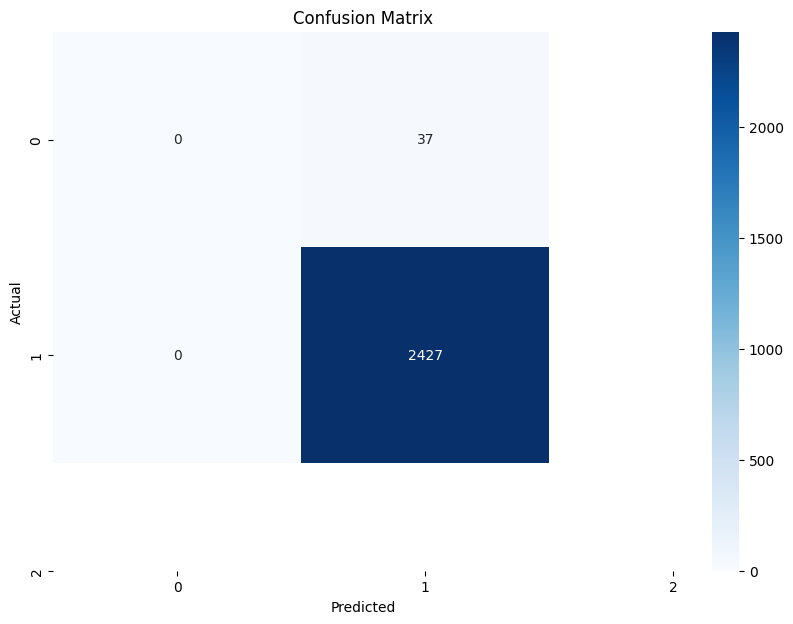

In [ ]:
# Scenario A: SVM 1

svm_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC(kernel='linear', random_state=42))
])

# Define hyperparameters for GridSearchCV
svm_param_grid = {
    'svm__C': [0.1, 1, 10],
    'svm__gamma': [0.1, 1, 10]
}

svm_grid = GridSearchCV(svm_pipe, svm_param_grid, cv=5)
svm_grid.fit(X_train, y_train)
svm_pred = svm_grid.predict(X_test)

print("SVM Best Parameters:", svm_grid.best_params_)
print("SVM Accuracy:", accuracy_score(y_test, svm_pred))

print("SVM Classification Report:")
print(classification_report(y_test, svm_pred))
conf_matrix = confusion_matrix(y_test, svm_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

SVM Best Parameters: {'svm__C': 0.01, 'svm__gamma': 0.1}
SVM Accuracy: 0.9849837662337663
SVM Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        37
           1       0.98      1.00      0.99      2427

    accuracy                           0.98      2464
   macro avg       0.49      0.50      0.50      2464
weighted avg       0.97      0.98      0.98      2464



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


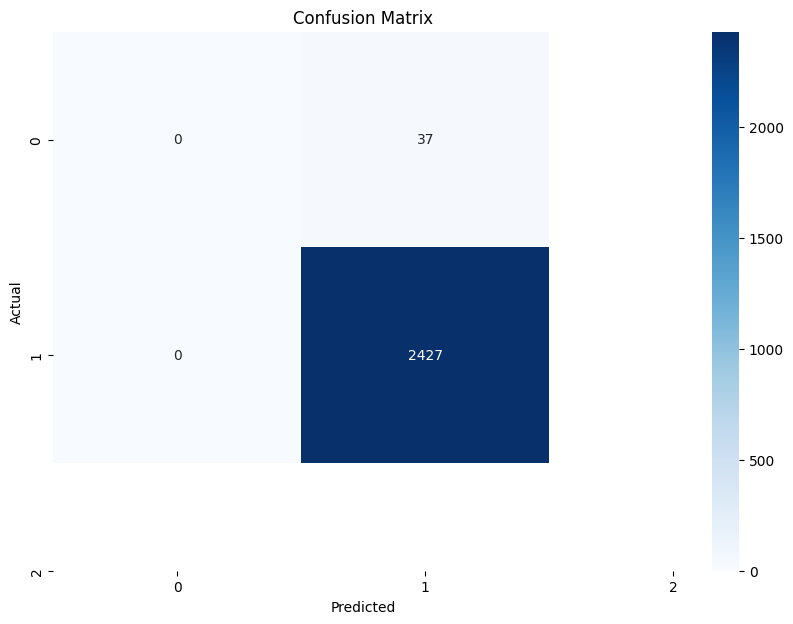

In [ ]:
# Scenario A: SVM 2

svm_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC(kernel='linear', random_state=42))
])

# Define hyperparameters for GridSearchCV
svm_param_grid = {
    'svm__C': [0.01, 0.1, 1, 10, 100],
    'svm__gamma': [0.1, 1, 10]
}

svm_grid = GridSearchCV(svm_pipe, svm_param_grid, cv=5)
svm_grid.fit(X_train, y_train)
svm_pred = svm_grid.predict(X_test)

print("SVM Best Parameters:", svm_grid.best_params_)
print("SVM Accuracy:", accuracy_score(y_test, svm_pred))

print("SVM Classification Report:")
print(classification_report(y_test, svm_pred))
conf_matrix = confusion_matrix(y_test, svm_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Scenario A: SVM 3

svm_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC(kernel='linear', random_state=42))
])

# Define hyperparameters for GridSearchCV
svm_param_grid = {
    'svm__C': [0.1, 1, 10],
    'svm__gamma': [0.01, 0.1, 1, 10, 100]
}

svm_grid = GridSearchCV(svm_pipe, svm_param_grid, cv=5)
svm_grid.fit(X_train, y_train)
svm_pred = svm_grid.predict(X_test)

print("SVM Best Parameters:", svm_grid.best_params_)
print("SVM Accuracy:", accuracy_score(y_test, svm_pred))

print("SVM Classification Report:")
print(classification_report(y_test, svm_pred))
conf_matrix = confusion_matrix(y_test, svm_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Neural Network Best Parameters: {'nn__alpha': 0.01, 'nn__hidden_layer_sizes': (50,)}
Neural Network Accuracy: 0.9849837662337663
Neural Network Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        37
           1       0.98      1.00      0.99      2427

    accuracy                           0.98      2464
   macro avg       0.49      0.50      0.50      2464
weighted avg       0.97      0.98      0.98      2464



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


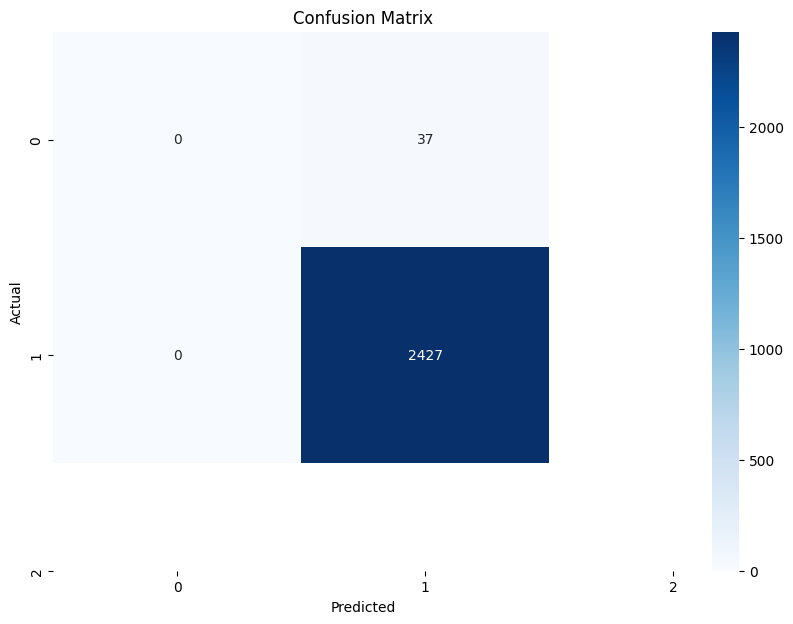

In [ ]:
# Scenario A: Neural Network 1
nn_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('nn', MLPClassifier(max_iter=1000, random_state=42))
])

# Define hyperparameters for GridSearchCV
nn_param_grid = {
    'nn__hidden_layer_sizes': [(50,), (100,), (50, 50)],
    'nn__alpha': [0.0001, 0.001, 0.01]
}

nn_grid = GridSearchCV(nn_pipe, nn_param_grid, cv=5)
nn_grid.fit(X_train, y_train)
nn_pred = nn_grid.predict(X_test)

print("Neural Network Best Parameters:", nn_grid.best_params_)
print("Neural Network Accuracy:", accuracy_score(y_test, nn_pred))

print("Neural Network Classification Report:")
print(classification_report(y_test, nn_pred))

conf_matrix3 = confusion_matrix(y_test, nn_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix3, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
 # Scenario A: Neural Network 2
nn_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('nn', MLPClassifier(max_iter=1000, random_state=42))
])

# Define hyperparameters for GridSearchCV
nn_param_grid = {
    'nn__hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50), (50, 50, 50)],
    # You can add or remove tuples to specify different architectures
    'nn__alpha': [0.0001, 0.001, 0.01],
    'nn__max_iter': [100, 500, 1000]
}
nn_grid = GridSearchCV(nn_pipe, nn_param_grid, cv=5)
nn_grid.fit(X_train, y_train)
nn_pred = nn_grid.predict(X_test)

print("Neural Network Best Parameters:", nn_grid.best_params_)
print("Neural Network Accuracy:", accuracy_score(y_test, nn_pred))

print("Neural Network Classification Report:")
print(classification_report(y_test, nn_pred))

conf_matrix = confusion_matrix(y_test, nn_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Scenario B:
# Generate sample data# Import necessary libraries

# Load the dataset
uploaded = files.upload()

# Load the dataset
data = pd.read_csv("cleaned.csv")

# Data Preprocessing
categorical_cols = ['Age_band_of_driver', 'Sex_of_driver', 'Educational_level',
       'Vehicle_driver_relation', 'Driving_experience', 'Lanes_or_Medians',
       'Types_of_Junction', 'Road_surface_type', 'Light_conditions',
       'Weather_conditions', 'Type_of_collision', 'Vehicle_movement',
       'Pedestrian_movement', 'Cause_of_accident', 'Accident_severity']

# Initialize LabelEncoder for each categorical column
label_encoders = {}
for col in categorical_cols:
    label_encoders[col] = LabelEncoder()
    data[col] = label_encoders[col].fit_transform(data[col])

# Select features and target variable
selected_features = ['Age_band_of_driver', 'Sex_of_driver', 'Educational_level',
       'Vehicle_driver_relation', 'Driving_experience', 'Lanes_or_Medians',
       'Types_of_Junction', 'Road_surface_type', 'Light_conditions',
       'Weather_conditions', 'Type_of_collision', 'Vehicle_movement',
       'Pedestrian_movement', 'Cause_of_accident']
X = data[selected_features]
y = data['Accident_severity']  # Use the original 'Accident_severity' as the target variable for multi-class classification

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

unique_values = y_train.unique()
print("Unique values in y_train:", unique_values)

print("Data preprocessing successful")

#X, y = make_classification(n_samples=1000, n_features=20, n_classes=3, random_state=42)

# Split the data into training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Saving cleaned.csv to cleaned (15).csv
Unique values in y_train: [2 1 0]
Data preprocessing successful


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.8376623376623377
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        37
           1       0.00      0.00      0.00       363
           2       0.84      1.00      0.91      2064

    accuracy                           0.84      2464
   macro avg       0.28      0.33      0.30      2464
weighted avg       0.70      0.84      0.76      2464



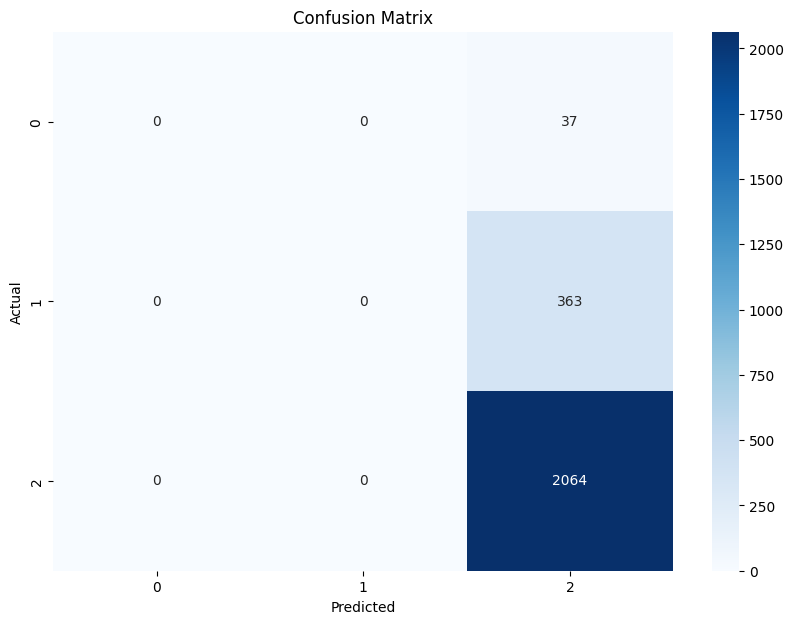

In [ ]:

# Scenario B: SVM
svm_classifier = SVC(kernel='linear', C=1.0, random_state=42)

# Train the model
svm_classifier.fit(X_train, y_train)

# Make predictions
y_pred = svm_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the evaluation results
print("Accuracy:", accuracy)
print("Classification Report:\n", report)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
# Scenario B: Neural Network 1

nn_classifier = MLPClassifier(hidden_layer_sizes=(50,), activation='relu', solver='adam', max_iter=500, random_state=42)

# Train the model
nn_classifier.fit(X_train, y_train)

# Make predictions
y_pred = nn_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the evaluation results
print("Accuracy:", accuracy)
print("Classification Report:\n", report)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Scenario B: Neural Network 2

nn_classifier = MLPClassifier(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', max_iter=500, random_state=42)

# Train the model
nn_classifier.fit(X_train, y_train)

# Make predictions
y_pred = nn_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the evaluation results
print("Accuracy:", accuracy)
print("Classification Report:\n", report)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Scenerio B: Random Forest 1
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_classifier.fit(X_train, y_train)

# Make predictions
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the evaluation results
print("Accuracy:", accuracy)
print("Classification Report:\n", report)
conf_matrix = confusion_matrix(y_test, rf_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest')
plt.show()

In [ ]:
# Scenerio B: Random Forest 2
rf_classifier = RandomForestClassifier(n_estimators=300, random_state=42)

# Train the model
rf_classifier.fit(X_train, y_train)

# Make predictions
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the evaluation results
print("Accuracy:", accuracy)
print("Classification Report:\n", report)
conf_matrix = confusion_matrix(y_test, rf_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest')
plt.show()